In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper'] #This is engineering a feature because it didn't exist in the original data

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

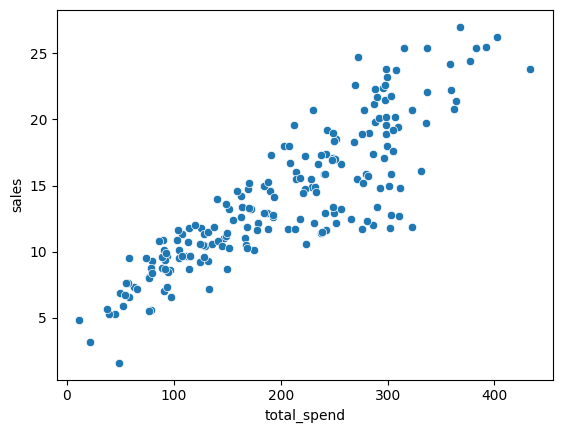

In [6]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')

<Axes: xlabel='total_spend', ylabel='sales'>

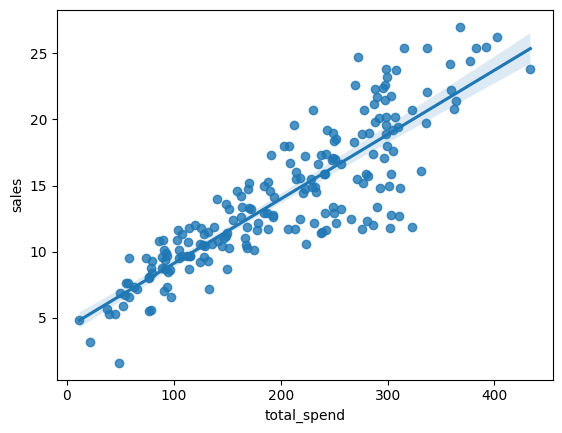

In [7]:
sns.regplot(data = df, x = 'total_spend', y = 'sales')
#Seaborn can plot a regression line with Ordinary Least Squares via the regplot() function

Finding Simple Linear Regression:

In [8]:
X = df['total_spend'] #Capital due to convention for feature matrix
y = df['sales'] #Lowercase due to convention for label (target output)

In [9]:
help(np.polyfit) #Returns the coefficients for a regression function using Ordinary Least Squares (OLS)
#For now, degree = 1

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y 

In [10]:
np.polyfit(X, y, deg = 1) #y = B1x + B0
#Returns from highest power of x to lowest

array([0.04868788, 4.24302822])

Predicting With Simple Linear Regression:

In [11]:
potential_spend = np.linspace(0, 500, 100)

In [12]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

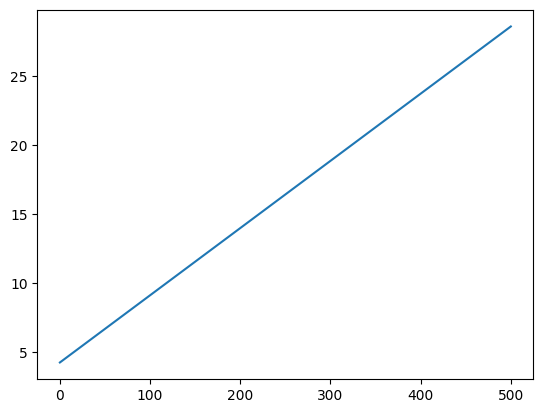

In [13]:
plt.plot(potential_spend, predicted_sales)

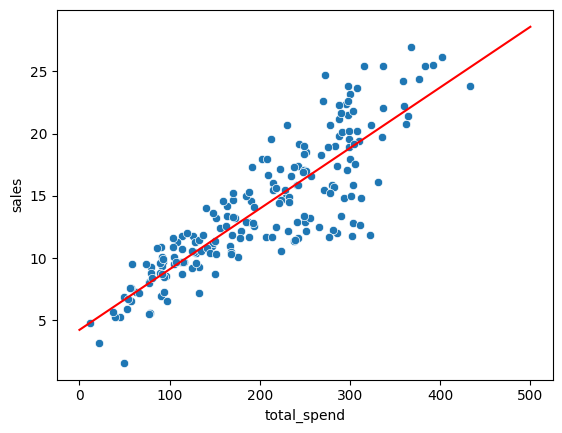

In [14]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df)
plt.plot(potential_spend, predicted_sales, color = 'red')

In [15]:
spend = 200

predicted_sale = 0.04868788 * spend + 4.24302822

In [16]:
predicted_sale

13.98060422

Simple Higher Order Regression:

In [17]:
np.polyfit(X, y, 3)
# y = B3*x**3 + B2*x**2 + B1*x + B0

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
pot_spend = np.linspace(0, 500, 100)

In [19]:
pred_sales = 3.07615033e-07 * pot_spend ** 3 + -1.89392449e-04 * pot_spend ** 2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

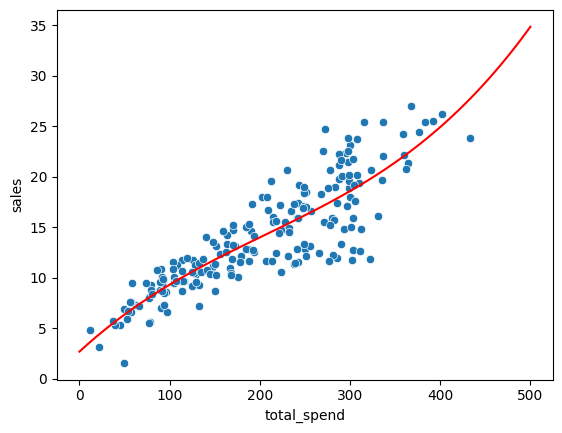

In [20]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df)
plt.plot(pot_spend, pred_sales, color = 'red')